In [341]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Datathon.csv", sep=",")
df.columns=["Transaccion","Comercio","Tipo Comercio","Especifico","Fecha","Pais","Forma Pago","Sexo","Estado","Edad","Monto","ID"]

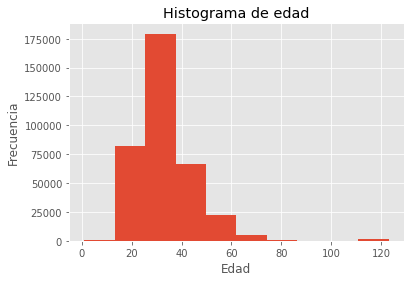

In [342]:
plt.style.use("ggplot")
# Create a histogram
plt.hist(df["Edad"])

# Add labels and title
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de edad')

# Show the plot

plt.show()


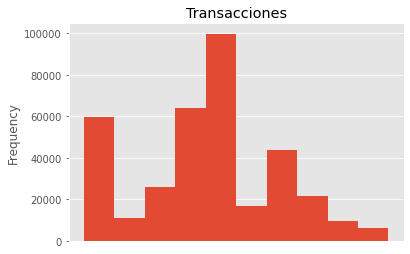

In [343]:


# Create a histogram
fig, ax = plt.subplots()
ax.hist(df["Estado"])

# Remove the x-axis
ax.xaxis.set_visible(False)

# Add labels and title
ax.set_ylabel('Frequency')
ax.set_title('Transacciones')

# Show the plot
plt.show()

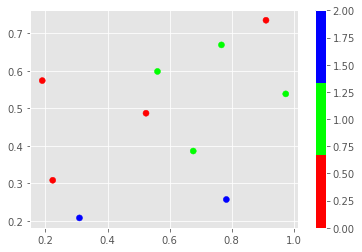

In [344]:
from matplotlib.colors import ListedColormap
import numpy as np

# Define the colormap
colors = ['#ff0000', '#00ff00', '#0000ff']  # Red, green, blue
cmap = ListedColormap(colors)

# Create some sample data
x = np.random.rand(10)
y = np.random.rand(10)
z = np.random.randint(0, 3, size=10)

# Create a scatter plot with the custom colormap
plt.scatter(x, y, c=z, cmap=cmap)

# Add a colorbar
plt.colorbar()

# Show the plot
plt.show()

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358360 entries, 0 to 358359
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Transaccion    358360 non-null  object 
 1   Comercio       358360 non-null  object 
 2   Tipo Comercio  358360 non-null  object 
 3   Especifico     358360 non-null  object 
 4   Fecha          358360 non-null  object 
 5   Pais           358360 non-null  object 
 6   Forma Pago     358360 non-null  object 
 7   Sexo           358360 non-null  object 
 8   Estado         358360 non-null  object 
 9   Edad           358360 non-null  float64
 10  Monto          358360 non-null  float64
 11  ID             358360 non-null  int64  
dtypes: float64(2), int64(1), object(9)
memory usage: 32.8+ MB


# Separar la columna de fecha y hora

In [346]:


lista = df['Fecha'].str.split(" ")
fecha=[]
hora=[]
for i in range (len(lista)):
    fecha.append(lista[i][0])
    hora.append(lista[i][1])
Fecha=[]
for i in range(len(fecha)):
    Fecha.append(fecha[i].split("-"))
Hora = []
for i in range(len(hora)):
    Hora.append(hora[i].split(":"))


In [347]:
Fecha = pd.DataFrame(Fecha,columns=["Año","Mes","Dia"])
Hora = pd.DataFrame(Hora,columns=["Hora","Minuto","Segundo"])
Hora = pd.DataFrame(Hora,columns=["Hora","Minuto"])
Tiempo = np.concatenate((Fecha,Hora),axis=1)
Tiempo = pd.DataFrame(Tiempo,columns=["Año","Mes","Dia","Hora","Minuto" ]).astype(int)
Tiempo["Hora"].min()


0

# Crear una columna con el tiempo de forma ordinal


In [348]:
from datetime import date
from datetime import datetime
fechita = date(Tiempo['Año'][0],Tiempo['Mes'][0],Tiempo['Dia'][0])
fechita=[]
for i in range(len(Tiempo)):
    fechita.append(date(Tiempo['Año'][i],Tiempo['Mes'][i],Tiempo['Dia'][i]).toordinal())
    i+=1
id = df["ID"]
id = pd.DataFrame(id)
fechita= pd.DataFrame(fechita)
monto = pd.DataFrame(df["Monto"])


In [349]:
FechaCompra = np.concatenate((fechita,Hora,monto,id),axis=1)
FechaCompra=pd.DataFrame(FechaCompra,columns=['Fecha','Hora','Minuto','Monto',"ID"])
FechaCompra["Fecha"] -= 738467
week = []
for i in range(len(FechaCompra)):
    week.append(FechaCompra["Fecha"][i]//7)
week = pd.DataFrame(week)


,Week,Fecha,Hora,Minuto,Monto,ID
0,10,73,13,48,65.04,933
1,11,81,13,58,143.18,8562
2,11,82,13,37,84.8,3980
3,13,95,15,06,124.22,9389
4,11,77,12,50,17.44,1845
...,...,...,...,...,...,...
358355,9,66,14,36,531.91,463
358356,2,19,02,22,531.24,4167
358357,15,111,15,35,523.99,3264
358358,4,31,18,28,548.17,8180


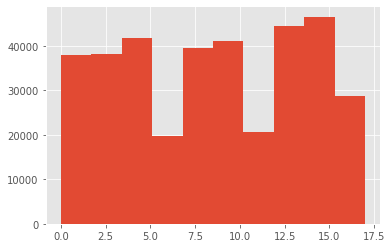

In [350]:
FechaCompra = np.concatenate((week,fechita,Hora,monto,id),axis=1)
FechaCompra=pd.DataFrame(FechaCompra,columns=['Week','Fecha','Hora','Minuto','Monto',"ID"])
FechaCompra["Fecha"] -=738467
Navidad = FechaCompra[FechaCompra["Fecha"] == 33].groupby("Fecha")["Monto"].sum()
gastosdias =FechaCompra.groupby("Fecha")["Monto"].sum().sort_values()
FechaCompra["Week"].hist()
FechaCompra

In [351]:
FechaCompra["Hora"].value_counts()

19    27524
18    26563
14    26155
15    25719
20    25574
17    25437
16    25434
13    23696
12    21377
21    20793
11    19028
10    16577
22    14010
09    13637
08    10404
23     9118
07     6175
00     5521
01     3694
06     3625
02     2469
05     2242
03     1794
04     1794
Name: Hora, dtype: int64

In [352]:
df3 = np.concatenate((df,FechaCompra),axis=1)
df3=pd.DataFrame(df3,columns=["Transaccion","Comercio","Tipo Comercio","Especifico","Fecha","Pais","Forma Pago","Sexo","Estado","Edad","Monto","ID","Week","Fecha","Hora","Minuto","1","2"])
df3["Hora"].value_counts()

19    27524
18    26563
14    26155
15    25719
20    25574
17    25437
16    25434
13    23696
12    21377
21    20793
11    19028
10    16577
22    14010
09    13637
08    10404
23     9118
07     6175
00     5521
01     3694
06     3625
02     2469
05     2242
03     1794
04     1794
Name: Hora, dtype: int64

In [353]:
df4=df3.loc[df3["Hora"]=="22"]
df4["Tipo Comercio"].value_counts()


RETAIL                               2793
AGREGADOR                            1751
OTROS                                1524
TRANSPORTE TERRESTRE DE PASAJEROS    1451
SUPERMERCADOS                        1366
RESTAURANTE                          1276
GASOLINERAS                           801
FARMACIAS                             664
ENTRETENIMIENTO                       619
COMIDA RAPIDA                         572
MISCELANEAS                           440
TELECOMUNICACIONES                    293
GOBIERNO                              191
TRANSPORTE AEREO                       67
HOTELES                                58
COLEGIOS Y UNIVERSIDADES               48
ESTACIONAMIENTOS                       27
AGENCIAS DE VIAJES                     16
PEAJE                                  12
ASEGURADORAS                           11
MEDICOS Y DENTISTAS                     7
EDUCACIN BASICA                         6
BENEFICENCIA                            5
REFACCIONES Y FERRETERIA          

In [354]:
xd=df4.loc[df4["Tipo Comercio"]=="GOBIERNO"]

Week
16    4290688.57
14    4017582.17
5     3997356.15
12    3946698.02
6     3687592.04
1     3664265.44
7     3629691.13
15    3618699.49
9     3575700.39
8     3538228.18
3     3500761.22
13    3490017.98
4     3464492.78
11    3344520.67
10    3286879.91
2     2968320.88
0     2935527.57
17     542238.24
Name: Monto, dtype: object

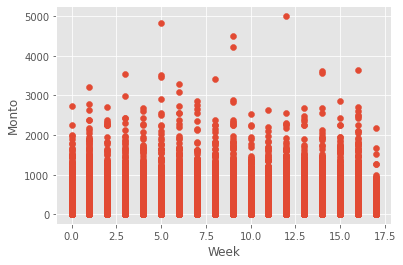

In [355]:
import matplotlib.pyplot as plt

plt.scatter(FechaCompra["Week"], FechaCompra["Monto"])
plt.xlabel("Week")
plt.ylabel("Monto")
gastossemana =FechaCompra.groupby("Week")["Monto"].sum().sort_values(ascending=False)
gastossemana

# Gasto semanal por ID

In [356]:
gastosdiaid =FechaCompra.groupby(["Fecha","ID"])["Monto"].sum()
gastosdiaid = pd.DataFrame(gastosdiaid)
gastosdiaid=gastosdiaid.reset_index()
gastosdiaid

,Fecha,ID,Monto
0,0,9,105.51
1,0,10,31.91
2,0,19,172.72
3,0,23,122.13
4,0,32,569.1
...,...,...,...
222973,119,9968,84.9
222974,119,9970,267.64
222975,119,9984,67.34
222976,119,9985,253.43


In [357]:
q1=5
dias_quincena=[q1,q1+15,q1+15*2,q1+15*3,q1+15*4,q1+15*5,q1+15*6,q1+15*7]
dias_quincena[0]


5

In [358]:

mask=(gastosdiaid["Fecha"]==dias_quincena[0]) | (gastosdiaid["Fecha"]==dias_quincena[1])| (gastosdiaid["Fecha"]==dias_quincena[2])| (gastosdiaid["Fecha"]==dias_quincena[3])| (gastosdiaid["Fecha"]==dias_quincena[4]) | (gastosdiaid["Fecha"]==dias_quincena[5])| (gastosdiaid["Fecha"]==dias_quincena[6])| (gastosdiaid["Fecha"]==dias_quincena[7])

quincenaID = gastosdiaid.loc[mask]
quincenaID

,Fecha,ID,Monto
8162,5,9,112.5
8163,5,33,152.17
8164,5,55,508.88
8165,5,71,609.1
8166,5,73,701.86
...,...,...,...
203485,110,9942,417.39
203486,110,9961,285.84
203487,110,9966,47.87
203488,110,9971,69.83


In [359]:
gastossemanaid =FechaCompra.groupby(["Week","ID"])["Monto"].sum()
gastossemanaid = pd.DataFrame(gastossemanaid)

In [360]:
gastossemanaid=gastossemanaid.reset_index()

promediosemanal=gastossemanaid.groupby(["ID"])["Monto"].mean()
promediosemanal = pd.DataFrame(promediosemanal,columns=["Monto"])
promediosemanal=promediosemanal.reset_index()
promediosemanal

,ID,Monto
0,1,114.680000
1,2,627.342000
2,3,610.346667
3,4,359.928571
4,5,1002.724167
...,...,...
9995,9996,676.600625
9996,9997,139.175000
9997,9998,495.320000
9998,9999,411.035000


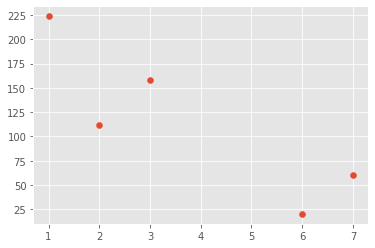

In [361]:
semanalID=gastossemanaid.loc[gastossemanaid["ID"]== 1]
semanalID2=gastossemanaid.loc[gastossemanaid["ID"]== 7]
plt.scatter(semanalID["Week"],semanalID["Monto"])

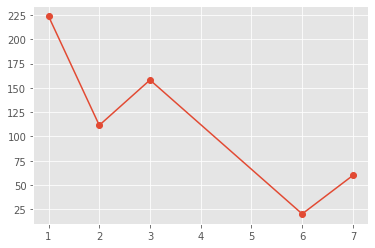

In [362]:
plt.plot(semanalID["Week"],semanalID["Monto"],'-o')

In [363]:
TDD = df[df["Transaccion"] == "TDD"].groupby("ID")["Transaccion"].count()
TDD = TDD.reindex(df["ID"].unique(), fill_value=0)
TDD = pd.DataFrame({"TDD":TDD})
TDD = TDD.sort_values("ID")
TDC = df[df["Transaccion"] == "TDC"].groupby("ID")["Transaccion"].count()
TDC = TDC.reindex(df["ID"].unique(), fill_value=0)
TDC = pd.DataFrame({"TDC":TDC})
TDC = TDC.sort_values("ID")
ID = df["ID"].sort_values().unique()
ID = pd.DataFrame(ID,columns=["ID"])
transaccion = df.groupby("ID")["Transaccion"].count()
transaccion = pd.DataFrame(transaccion,columns=["Transaccion"])
suma = df.groupby("ID")["Monto"].sum()
edad = df.groupby("ID")["Edad"].mean()
suma = pd.DataFrame(suma,columns=["Monto"])
edad = pd.DataFrame(edad,columns= ["Edad"])

In [364]:
agrupacion = np.concatenate((ID,suma,edad,transaccion,TDD,TDC),axis=1)
agrupacion = pd.DataFrame(agrupacion,columns=["ID","Monto","Edad","Total de Transacciones","TDD","TDC"])
agrupacion.Edad.value_counts(bins=[0,17,35,50,80,100,123]) #Cantidad de gente por edad
#agrupacion.loc[agrupacion["ID"]==8828]
agrupacion

,ID,Monto,Edad,Total de Transacciones,TDD,TDC
0,1.0,573.40,38.0,5.0,5.0,0.0
1,2.0,3136.71,28.0,12.0,12.0,0.0
2,3.0,1831.04,45.0,4.0,4.0,0.0
3,4.0,2519.50,51.0,10.0,10.0,0.0
4,5.0,12032.69,1.0,108.0,108.0,0.0
...,...,...,...,...,...,...
9995,9996.0,10825.61,24.0,63.0,3.0,60.0
9996,9997.0,278.35,48.0,3.0,3.0,0.0
9997,9998.0,495.32,23.0,3.0,0.0,3.0
9998,9999.0,1644.14,29.0,14.0,0.0,14.0


# CLUSTERS

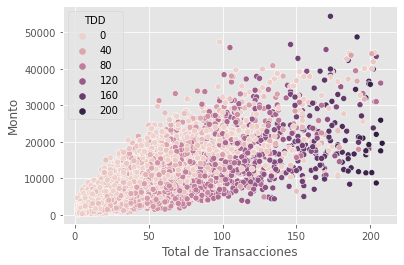

In [365]:
x = agrupacion[["Total de Transacciones","Monto"]]
y = agrupacion[["Edad"]]
sns.scatterplot(data=agrupacion,x="Total de Transacciones",y="Monto",hue="TDD")
plt.grid(True)

In [366]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42) #80% de training y 20% de test, 42 es la semilla de aleatoreidad.

In [367]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)
X_train['ID'] = X_train.index
X_train

,Total de Transacciones,Monto,ID
9254,4.0,468.56,9254
1561,114.0,11323.63,1561
1670,86.0,6918.38,1670
6087,9.0,1983.43,6087
6669,20.0,3518.15,6669
...,...,...,...
5734,12.0,1147.48,5734
5191,43.0,5596.32,5191
5390,32.0,3820.07,5390
860,134.0,27432.36,860


In [368]:
X_train_norm

array([[0.00853648, 0.99996356],
       [0.01006693, 0.99994933],
       [0.0124297 , 0.99992275],
       ...,
       [0.00837652, 0.99996492],
       [0.00488468, 0.99998807],
       [0.00825338, 0.99996594]])

In [369]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)
kmeans.labels_
k=pd.DataFrame(kmeans.labels_,columns=["label"])
k

,label
0,1
1,1
2,0
3,1
4,1
...,...
7995,0
7996,1
7997,1
7998,1


In [370]:
resultados=np.concatenate((X_train,k),axis=1)
resultados=pd.DataFrame(resultados,columns=["Total_transacciones","Monto","ID","label"])
resultados["ID"]=resultados["ID"].astype(int)
resultados

,Total_transacciones,Monto,ID,label
0,4.0,468.56,9254,1.0
1,114.0,11323.63,1561,1.0
2,86.0,6918.38,1670,0.0
3,9.0,1983.43,6087,1.0
4,20.0,3518.15,6669,1.0
...,...,...,...,...
7995,12.0,1147.48,5734,0.0
7996,43.0,5596.32,5191,1.0
7997,32.0,3820.07,5390,1.0
7998,134.0,27432.36,860,1.0


<AxesSubplot: xlabel='Total de Transacciones', ylabel='Monto'>

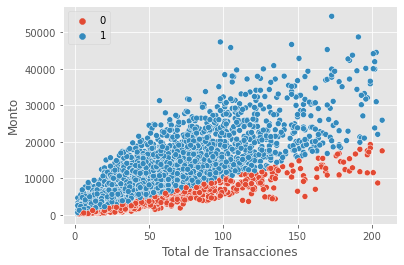

In [371]:
sns.scatterplot(data = X_train, x = "Total de Transacciones", y = "Monto", hue = kmeans.labels_)

In [372]:
k_prediction=kmeans.predict(X_test_norm)

c:\Users\angel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\angel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\angel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\angel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

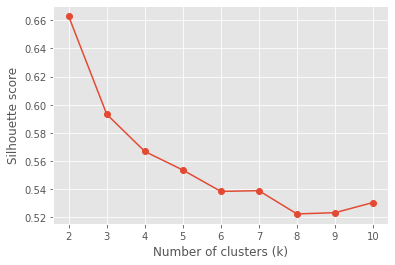

In [373]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate some random data
X = np.random.rand(100, 2)

# Define the range of k values to test
k_min = 2
k_max = 10
k_values = range(k_min, k_max+1)

# Initialize lists to store silhouette scores and cluster labels for each k
silhouette_scores = []
cluster_labels = []

# Iterate over the range of k values and calculate the silhouette score for each
for k in k_values:
    # Fit KMeans clustering model to data
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train_norm)
    
    # Calculate the silhouette score for the current value of k
    score = silhouette_score(X_train_norm ,kmeans.labels_)
    
    # Add the silhouette score and cluster labels to the respective lists
    silhouette_scores.append(score)
    cluster_labels.append(kmeans.labels_)

# Plot the silhouette scores for each value of k
plt.plot(k_values, silhouette_scores, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show()

In [374]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_test_norm,k_prediction)
print("El modelo tiene un silhouette score de:",silhouette*100,"%")

El modelo tiene un silhouette score de: 65.9367506531819 %


<AxesSubplot: xlabel='Total de Transacciones', ylabel='Monto'>

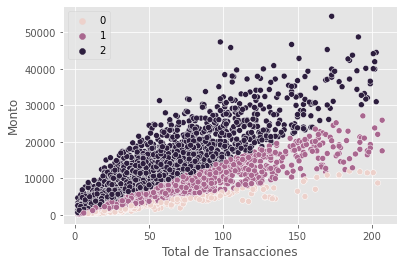

In [375]:
from sklearn.cluster import AgglomerativeClustering
Agg = AgglomerativeClustering(n_clusters=3)
Agg.fit(X_train_norm)
sns.scatterplot(data = X_train, x = "Total de Transacciones", y = "Monto", hue = Agg.labels_)

In [376]:
Agg_prediction=Agg.fit_predict(X_test_norm)

In [377]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_test_norm,Agg_prediction)
print("El modelo tiene un silhouette score de:",silhouette*100,"%")

El modelo tiene un silhouette score de: 53.08904008482062 %


In [378]:
import pandas as pd
inf2019_2022=1.03636*1.03397*1.05689*1.07896
arreglo = [['I',round(9807/3),round(10819/3)],['II',round(17324/3),round(15376/3)], ['III',round(23053/3),round(18641/3)],['IV',round(28714/3),round(21943/3)],['V',round(34762/3),round(25931/3)],['VI',round(41897/3),round(29458/3)],['VII',round(50844/3),round(34422/3)],['VIII',round(63348/3),round(40883/3)],['IX',round(84575/3),round(51835/3)],['X',round(179863/3),round(93980/3)]]
#print(arreglo)
for i in range(0, len(arreglo)):
    for j in range(0, len(arreglo[0])):
        if isinstance(arreglo[i][j],int):
            arreglo[i][j]*=inf2019_2022/2
            arreglo[i][j]=round(arreglo[i][j])
    #if isinstance(i2023, int):
     #   arreglo[i2023]=i2023*inf2019_2023
df_2= pd.DataFrame(arreglo, columns=['Decil', 'Ingresos','Gastos'])
df_2= df_2.reset_index(drop=True)

In [379]:
arreglo=[['I','0-2499','0-2999'],['II','2500-3999','3000-3499'],['III','4000-5399','3500-3999'],['IV','5400-6799','4000-4999'],['V','6800-8499','5000-5899'],['VI','8500-9999','5900-6599'],['VII','10000-11999','6600-7799'],['VIII','12000-16999','7800-9999'],['IX','17000-29999','10000-14999'],['X','+30000','+15000']]
df_3= pd.DataFrame(arreglo, columns=['Decil', 'Ingresos promedio','Gastos promedio'])

In [380]:
d_I = []
d_II = []
d_III = []
d_IV = []
d_V = []
d_VI = []
d_VII = []
d_VIII = []
d_IX = []
d_X = []
incorrecto = []
count = 1
for i in agrupacion['Monto']:
    if i >= 0 and i < 3000:
        d_I.append(count)
    elif i >= 3000 and i < 3500:
        d_II.append(count)
    elif i >= 3500 and i < 4000:
        d_III.append(count)
    elif i >= 4000 and i < 5000:
        d_IV.append(count)
    elif i >= 5000 and i < 5900:
        d_V.append(count)
    elif i >= 5900 and i < 6600:
        d_VI.append(count)
    elif i >= 6600 and i < 7800:
        d_VII.append(count)
    elif i >= 7800 and i < 10000:
        d_VIII.append(count)
    elif i >= 10000 and i < 15000:
        d_IX.append(count)
    elif i >= 15000:
        d_X.append(count)
    count += 1
arreglo=[len(d_I),len(d_II),len(d_III),len(d_IV),len(d_V),len(d_VI),len(d_VII),len(d_VIII),len(d_IX),len(d_X)]
print(len(incorrecto))
dframe = pd.DataFrame(arreglo, columns=['Cantidad de personas por decil (desde I - X) '])

0


In [381]:
suma=len(d_I)+len(d_II)+len(d_III)+len(d_IV)+len(d_V)+len(d_VI)+len(d_VII)+len(d_VIII)+len(d_IX)+len(d_X)
suma
percentage=[(len(d_I)/suma*100),(len(d_II)/suma*100),(len(d_III)/suma*100),(len(d_IV)/suma*100),(len(d_V)/suma*100),(len(d_VI)/suma*100),(len(d_VII)/suma*100),(len(d_VIII)/suma*100),(len(d_IX)/suma*100),(len(d_X)/suma*100),]
print(len(incorrecto))
dframe_3 = pd.DataFrame(percentage, columns=['Porcentaje de personas por decil (desde I - X) % '])

0


In [397]:
cont = 0
df = df.assign(Esencial=[0]*358360)
for i in df['ID']:
    if df['Tipo Comercio'][cont] == 'RETAIL':
        df['Esencial'][cont] =('NO ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'SUPERMERCADOS':
        df['Esencial'][cont] =('ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'AGREGADOR':
        df['Esencial'][cont] =('OTROS')
    elif df['Tipo Comercio'][cont] == 'OTROS':
        df['Esencial'][cont] =('OTROS')
    elif df['Tipo Comercio'][cont] == 'TRANSPORTE TERRESTRE DE PASAJEROS':
        df['Esencial'][cont] =('ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'GASOLINERAS':
        df['Esencial'][cont] =('ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'RESTAURANTE':
        df['Esencial'][cont] =('ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'COMIDA RAPIDA':
        df['Esencial'][cont] =('ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'MISCELANEAS':
        df['Esencial'][cont] =('NO ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'ENTRETENIMIENTO':
        df['Esencial'][cont] =('NO ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'FARMACIAS':
        df['Esencial'][cont] =('ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'TELECOMUNICACIONES':
        df['Esencial'][cont] =('ESENCIAL')   
    elif df['Tipo Comercio'][cont] == 'GOBIERNO':
        df['Esencial'][cont] =('ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'REFACCIONES Y FERRETERIA':
        df['Esencial'][cont] =('NO ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'MEDICOS Y DENTISTAS':
        df['Esencial'][cont] =('ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'HOTELES':
        df['Esencial'][cont] =('NO ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'COLEGIOS Y UNIVERSIDADES':
        df['Esencial'][cont] =('ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'TRANSPORTE AEREO':
        df['Esencial'][cont] =('ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'ASEGURADORAS':
        df['Esencial'][cont] =('ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'SALONES DE BELLEZA':
        df['Esencial'][cont] =('NO ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'BENEFICENCIA':
        df['Esencial'][cont] =('NO ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'ESTACIONAMIENTOS':
        df['Esencial'][cont] =('NO ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'PEAJE':
        df['Esencial'][cont] =('ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'EDUCACIN BASICA':
        df['Esencial'][cont] =('ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'AGENCIAS DE VIAJES':
        df['Esencial'][cont] =('NO ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'HOSPITALES':
        df['Esencial'][cont] =('ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'RENTA DE AUTOS':
        df['Esencial'][cont] =('NO ESENCIAL')
    elif df['Tipo Comercio'][cont] == 'GUARDERIAS':
        df['Esencial'][cont] =('NO ESENCIAL')
    cont += 1


C:\Users\angel\AppData\Local\Temp/ipykernel_2968/3194208886.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Esencial'][cont] =('ESENCIAL')


In [399]:
df["Esencial"].value_counts()
df.to_csv("Esencial2.csv")

In [383]:
caracteristicas=12
ID_clients=[0]*10000
#Primera característica

#ID_clients
for i in range (1,len(ID_clients)+1):
    for j in d_I:
        if j==i:
            ID_clients[i-1]=10
    for j in d_II:
        if j==i:
            ID_clients[i-1]=20
    for j in d_III:
        if j==i:
            ID_clients[i-1]=30
    for j in d_IV:
        if j==i:
            ID_clients[i-1]=40
    for j in d_V:
        if j==i:
            ID_clients[i-1]=50   
    for j in d_VI:
        if j==i:
            ID_clients[i-1]=60
    for j in d_VII:
        if j==i:
            ID_clients[i-1]=70
    for j in d_VIII:
        if j==i:
            ID_clients[i-1]=80
    for j in d_IX:
        if j==i:
            ID_clients[i-1]=90
    for j in d_X:
        if j==i:
            ID_clients[i-1]=100

In [384]:
for j in range(len(ID_clients)):
    #Segunda característica
    if df['Tipo Comercio'][j]== 'ASEGURADORAS':
        ID_clients[j]+=100
max(ID_clients)

200

In [385]:
ne_clients=[0]*10000
for i in range (len(df)):
    z=df['Esencial'][i]
    #print(z)
    if z=='-1':
        x=df['Monto'][i]
        y=df['ID'][i]
        ne_clients[y-1]+=x
ne_clients

for i in range (10000):
    if ne_clients[i]<=(0.375*agrupacion['Monto'][i]):
        ID_clients[i]+=100

score = pd.DataFrame(ID_clients)
agrupacion = np.concatenate((agrupacion,score),axis=1)
agrupacion = pd.DataFrame(agrupacion,columns=["ID","Monto","Edad","Total de Transacciones","TDD","TDC","Score"])
agrupacion.max()


ID                        10000.00
Monto                     54417.49
Edad                        123.00
Total de Transacciones      208.00
TDD                         208.00
TDC                         202.00
Score                       300.00
dtype: float64

In [386]:
for i in range(len(agrupacion)):
    if promediosemanal["Monto"][i] <= agrupacion["Monto"][i]/4:
        agrupacion["Score"][i]+=100
    i+=1
agrupacion["Monto"] =agrupacion["Monto"]*4
agrupacion["Score"] =agrupacion["Score"]/4
agrupacion.max()


ID                         10000.00
Monto                     217669.96
Edad                         123.00
Total de Transacciones       208.00
TDD                          208.00
TDC                          202.00
Score                        100.00
dtype: float64

In [387]:
minigru = agrupacion.groupby("ID")["Score"].unique()
minigru = pd.DataFrame(minigru,columns=["Score"])
minigru = minigru.reset_index()
sre = []
for i in range(len(resultados)):
    m= resultados["ID"][i]
    sre.append(minigru["Score"][m])
sre = pd.DataFrame(sre)
resultados = np.concatenate((resultados,sre),axis=1)
resultados= pd.DataFrame(resultados,columns=["Total transacciones","Monto", "ID", "Label","Score"])


Label
0.0    38.591792
1.0    45.940818
Name: Score, dtype: float64

In [393]:
resultados.groupby("Label")["Score"].var()

Label
0.0    308.395801
1.0    418.990172
Name: Score, dtype: float64

In [389]:
resultados

,Total transacciones,Monto,ID,Label,Score
0,4.0,468.56,9254.0,1.0,27.5
1,114.0,11323.63,1561.0,1.0,47.5
2,86.0,6918.38,1670.0,0.0,67.5
3,9.0,1983.43,6087.0,1.0,2.5
4,20.0,3518.15,6669.0,1.0,57.5
...,...,...,...,...,...
7995,12.0,1147.48,5734.0,0.0,27.5
7996,43.0,5596.32,5191.0,1.0,62.5
7997,32.0,3820.07,5390.0,1.0,32.5
7998,134.0,27432.36,860.0,1.0,50.0


In [391]:
resultados.groupby("Label")["Total transacciones"].mean()

Label
0.0    38.126566
1.0    35.224859
Name: Total transacciones, dtype: float64

In [392]:
resultados.groupby("Label")["Monto"].mean()

Label
0.0    2818.565376
1.0    6950.770967
Name: Monto, dtype: float64

In [388]:
agrupacion.to_csv("a.csv")

PermissionError: [Errno 13] Permission denied: 'a.csv'

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
X = agrupacion.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = agrupacion.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions



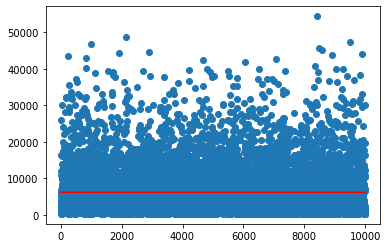

In [ ]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()